In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import MolecularClocks.src.methylation_util as m_util
from MolecularClocks.src.invasiveCpGs_consts import getConsts

consts = getConsts()

In [2]:
proj_dir = os.path.join(consts['official_indir'], 'Ringner')
beta_values = pd.read_table(os.path.join(proj_dir, 'GSE75067_betaValues.txt'), index_col=0)

In [3]:
dataset = 'ringner'
proj_dir = os.path.join(consts['indir'], dataset)
image_outdir = 'figures'

In [4]:
LUMP_purity = m_util.getLUMP_values(beta_values)
pureSamples = LUMP_purity.index[LUMP_purity > consts['lump_threshold'](dataset)].values
beta_values_PURE = beta_values[pureSamples]

CpG_list_outdir = os.path.join(consts['indir'], 'CpG_lists')
balanced_CpGs = np.loadtxt(os.path.join(consts['repo_dir'], 'Select_fCpGs', 'outputs', 'balanced_CpGs.txt'), dtype=str)
CpG_stdev_means = beta_values_PURE.std(axis=1)

NameError: name 'CpG_stdev_means' is not defined

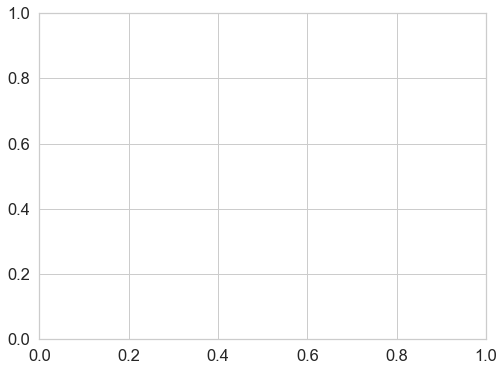

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

plot_data = pd.DataFrame({'CpG Stdev':CpG_stdev_means, 'Balanced Set':CpG_stdev_means.index.isin(balanced_CpGs)})

plot_data['Balanced Set'] = plot_data['Balanced Set'].map({True:'Balanced CpGs', False:'Not in Balanced CpGs'})
plot_data = plot_data.rename(columns={'Balanced Set':'Type'})
color_dict = {'Balanced CpGs':'lightcoral', 'Not in Balanced CpGs':'cornflowerblue'}

# for type_var in color_dict.keys():
#     mean = plot_data.loc[plot_data['Type'] == type_var, 'CpG Stdev'].mean()
#     ax.axvline(mean, color=color_dict[type_var])

plot = sns.histplot(ax=ax, data=plot_data, x='CpG Stdev', hue='Type', stat='proportion', common_norm=False, bins=100, palette=color_dict)
ax.set_xlabel('Standard Deviation of β in Ringner Samples')
#ax.set_xlim(right=0.2)
fig.savefig(os.path.join(consts['indir'], 'evidence', 'selection', 'Ringner-balanced_CpGs-validation.pdf'), format='pdf', pad_inches=0.1)

In [35]:
# scale factor
sf = 0.4

figsize = np.array([9, 7])
labelfontsize = 25
ticksfontsize = 18
opacity = 0.8

sns.set(rc={"savefig.bbox":'tight', 'axes.linewidth':sf}, font_scale=1, style='ticks')

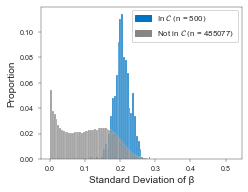

In [37]:
fig, ax = plt.subplots(1, 1, figsize=figsize * sf)

plot_data = pd.DataFrame({'CpG Stdev Means':CpG_stdev_means, 'Balanced Set':CpG_stdev_means.index.isin(balanced_CpGs)})

n_balanced = balanced_CpGs.shape[0]
n_not_balanced = CpG_stdev_means.shape[0] - n_balanced

label_balanced = 'In $\mathcal{C}$' + f' (n = {n_balanced})'
label_not_balanced = 'Not in $\mathcal{C}$' + f' (n = {n_not_balanced})'
plot_data['Balanced Set'] = plot_data['Balanced Set'].map({True:label_balanced, False:label_not_balanced})
plot_data = plot_data.rename(columns={'Balanced Set':'Type'})

color_dict = {label_balanced:consts['palette_jco'][0],
              label_not_balanced:consts['palette_jco'][2]}
# for type_var in color_dict.keys():
#     mean = plot_data.loc[plot_data['Type'] == type_var, 'CpG Stdev Means'].mean()
#     ax.axvline(mean, color=color_dict[type_var])

plot = sns.histplot(ax=ax, data=plot_data, x='CpG Stdev Means', hue='Type', stat='proportion', common_norm=False, bins=100, palette=color_dict,
                   legend=False, alpha=opacity)

ax.set_xlabel('Standard Deviation of β', fontsize=labelfontsize * sf)
ax.set_ylabel(ax.get_ylabel(), fontsize=labelfontsize * sf)
# ax.set_title(f'Lund Cohort (n = {beta_values_PURE.shape[1]})', fontsize=labelfontsize * sf)
ax.tick_params(axis='both', labelsize=ticksfontsize * sf, width=sf, length=8 * sf)

patches = [mpatches.Patch(color=color_dict[group], label=group) for group in color_dict.keys()]
plots_x, plots_y = ax.get_position().get_points()[1]
fig.legend(handles=patches,
           loc='upper right',
           bbox_to_anchor=(plots_x, plots_y + .005),
           fontsize=0.8*labelfontsize * sf
          )

# ax.set_xlim(right=0.2)
fig.savefig(os.path.join(image_outdir, 'Figure_2_C.pdf'), format='pdf', pad_inches=0.1)